<a href="https://colab.research.google.com/github/MahdiFaourr/MahdiFaourr/blob/main/mall_visiting_customers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/krishnaraj30/mall-visiting-customer-data")

In [ ]:
import pandas as pd
data=pd.read_csv("/content/mall-visiting-customer-data/Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 4)

In [ ]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])

In [ ]:
data=data.drop('CustomerID',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
training_data,testing_data=train_test_split(data.values,test_size=0.3,random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


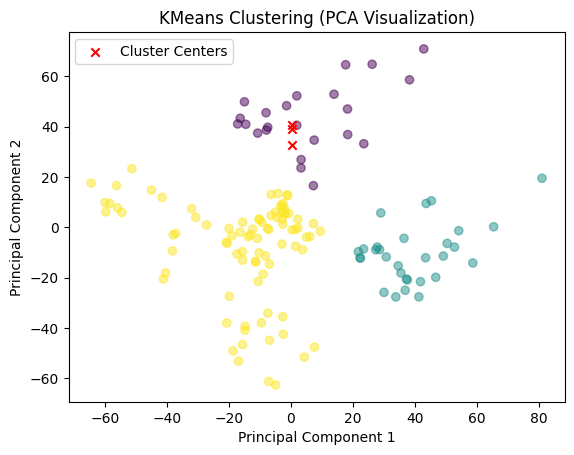

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(training_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Reduce dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(training_data)

# Plot data points with cluster labels
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', label='Cluster Centers')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (PCA Visualization)')

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import make_blobs

labels = kmeans.fit_predict(testing_data)

# Compute evaluation scores
silhouette = silhouette_score(testing_data, labels)
calinski_harabasz = calinski_harabasz_score(testing_data, labels)
davies_bouldin = davies_bouldin_score(testing_data, labels)

# Print evaluation scores
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.37862365936973064
Calinski-Harabasz Score: 34.53912863322469
Davies-Bouldin Score: 0.8871607860627901


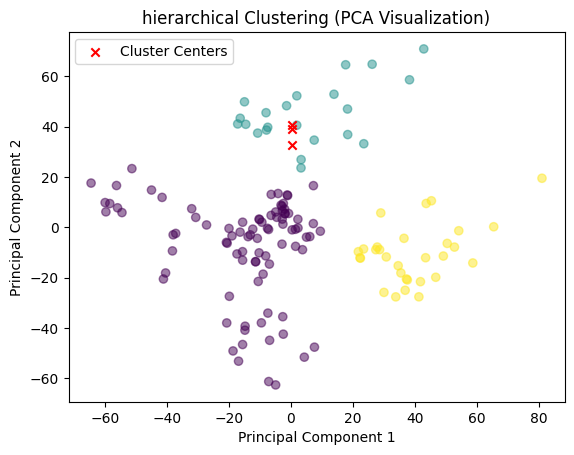

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Create AgglomerativeClustering object with 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3)

# Fit AgglomerativeClustering model to data
hierarchical.fit(training_data)

# Get cluster labels
labels = hierarchical.labels_


# Reduce dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(training_data)

# Plot data points with cluster labels
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', label='Cluster Centers')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('hierarchical Clustering (PCA Visualization)')

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import make_blobs

labels =hierarchical.fit_predict(testing_data)

# Compute evaluation scores
silhouette = silhouette_score(testing_data, labels)
calinski_harabasz = calinski_harabasz_score(testing_data, labels)
davies_bouldin = davies_bouldin_score(testing_data, labels)

# Print evaluation scores
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)


Silhouette Score: 0.3677672536602742
Calinski-Harabasz Score: 32.30656519544968
Davies-Bouldin Score: 0.8452634003868953
